In [1]:
!pip install openml
!pip install xgboost shap

In [2]:
import pandas as pd
import numpy as np

In [8]:
#Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.
#The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). that is the target

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [9]:
###### CSV file#######

In [31]:
df2 = pd.read_csv('data.csv')
# print(df2['class'])
df2

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [38]:
df2 = pd.read_csv('data.csv')
df2.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [39]:
df2['target']= np.where(df2['diagnosis']=='B',0,1)
df2 = df2.drop('diagnosis',axis=1)
df2 = df2.drop('id',axis=1)
df2 = df2.drop('Unnamed: 32',axis=1)
df2

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [40]:
import xgboost as xgb
import shap
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, recall_score

In [41]:
df2['target'].value_counts()

0    357
1    212
Name: target, dtype: int64

In [43]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df2.drop('target', axis=1), df2.target, test_size=0.2, random_state=20)

# Train an XGBoost model on the training set

# model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1, random_state=20)
model = xgb.XGBRegressor()
# Set the hyperparameters to tune
params = {'max_depth': [3, 4, 5], 'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [50, 100, 200]}

# Perform grid search cross-validation
grid_search_model = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
grid_search_model.fit(X_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search_model.best_params_)

# Make predictions on the test set using the best model
best_model = grid_search_model.best_estimator_
y_prediction = best_model.predict(X_test)

y_pred = np.where(y_prediction> 0.5, 1, 0)
# Compute precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the precision and recall
print('Precision:', precision)
print('Recall:', recall)



Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Precision: 0.9387755102040817
Recall: 0.9583333333333334


[12:01:30] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


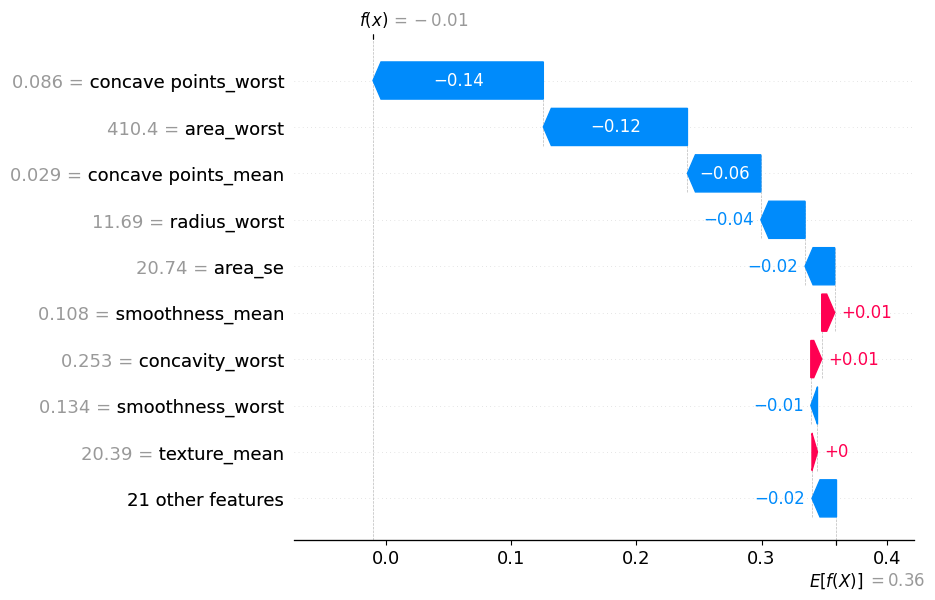

In [50]:
# # Create an explainer object using the SHAP package
explainer = shap.Explainer(best_model)

# Calculate SHAP values for the testing set
shap_values = explainer(X_test)

# Plot the SHAP values for a single instance of the testing set
shap.plots.waterfall(shap_values[0])

In [51]:
# Convert the SHAP values to a Pandas DataFrame
shap_df = pd.DataFrame(shap_values.values, columns=shap_values.feature_names)

# Print the first few rows of the SHAP DataFrame
shap_df.iloc[1].sort_values()

concave points_worst      -0.122654
concave points_mean       -0.076157
texture_mean              -0.052893
smoothness_worst          -0.019735
perimeter_mean            -0.012664
area_se                   -0.008957
perimeter_worst           -0.006595
symmetry_mean             -0.005455
fractal_dimension_se      -0.005083
symmetry_worst            -0.003028
radius_se                 -0.002500
radius_mean               -0.002181
smoothness_mean           -0.000946
perimeter_se              -0.000326
concavity_mean            -0.000211
fractal_dimension_worst    0.000000
texture_se                 0.000000
compactness_worst          0.000296
symmetry_se                0.000369
fractal_dimension_mean     0.000391
concave points_se          0.001116
smoothness_se              0.003624
area_mean                  0.007122
texture_worst              0.010064
compactness_mean           0.016408
concavity_se               0.020659
concavity_worst            0.073403
compactness_se             0

In [54]:
y_test

269    0
263    1
30     1
452    0
214    1
      ..
17     1
504    0
346    0
14     1
110    0
Name: target, Length: 114, dtype: int64

In [52]:
X_test


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
269,10.710,20.39,69.50,344.9,0.10820,0.12890,0.08448,0.028670,0.1668,0.06862,...,11.69,25.21,76.51,410.4,0.1335,0.2550,0.25340,0.08600,0.2605,0.08701
263,15.610,19.38,100.00,758.6,0.07840,0.05616,0.04209,0.028470,0.1547,0.05443,...,17.91,31.67,115.90,988.6,0.1084,0.1807,0.22600,0.08568,0.2683,0.06829
30,18.630,25.11,124.80,1088.0,0.10640,0.18870,0.23190,0.124400,0.2183,0.06197,...,23.15,34.01,160.50,1670.0,0.1491,0.4257,0.61330,0.18480,0.3444,0.09782
452,12.000,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.019450,0.1615,0.06104,...,13.09,37.88,85.07,523.7,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194
214,14.190,23.81,92.87,610.7,0.09463,0.13060,0.11150,0.064620,0.2235,0.06433,...,16.86,34.85,115.00,811.3,0.1559,0.4059,0.37440,0.17720,0.4724,0.10260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,16.130,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.102800,0.2164,0.07356,...,20.96,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420
504,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.052520,0.2378,0.09502,...,10.28,16.38,69.05,300.2,0.1902,0.3441,0.20990,0.10250,0.3038,0.12520
346,12.060,18.90,76.66,445.3,0.08386,0.05794,0.00751,0.008488,0.1555,0.06048,...,13.64,27.06,86.54,562.6,0.1289,0.1352,0.04506,0.05093,0.2880,0.08083
14,13.730,22.61,93.60,578.3,0.11310,0.22930,0.21280,0.080250,0.2069,0.07682,...,15.03,32.01,108.80,697.7,0.1651,0.7725,0.69430,0.22080,0.3596,0.14310


In [55]:
shap_values.data[1]

array([1.561e+01, 1.938e+01, 1.000e+02, 7.586e+02, 7.840e-02, 5.616e-02,
       4.209e-02, 2.847e-02, 1.547e-01, 5.443e-02, 2.298e-01, 9.988e-01,
       1.534e+00, 2.218e+01, 2.826e-03, 9.105e-03, 1.311e-02, 5.174e-03,
       1.013e-02, 1.345e-03, 1.791e+01, 3.167e+01, 1.159e+02, 9.886e+02,
       1.084e-01, 1.807e-01, 2.260e-01, 8.568e-02, 2.683e-01, 6.829e-02])

In [58]:
explain_cancer=shap_df.iloc[1].sort_values()
explain_cancer = pd.DataFrame(explain_cancer)
explain_cancer_ds = explain_cancer.reset_index()


In [59]:
explain_cancer_ds.columns=['Col_name','Shap_value']

In [60]:
explain_cancer_ds

,Col_name,Shap_value
0,concave points_worst,-0.122654
1,concave points_mean,-0.076157
2,texture_mean,-0.052893
3,smoothness_worst,-0.019735
4,perimeter_mean,-0.012664
5,area_se,-0.008957
6,perimeter_worst,-0.006595
7,symmetry_mean,-0.005455
8,fractal_dimension_se,-0.005083
9,symmetry_worst,-0.003028


In [61]:
def_variable = pd.read_csv('Col_defn.csv')
explain_cancer_doc = pd.merge(explain_cancer_ds,def_variable, on='Col_name')

In [62]:
pd.set_option('display.max_colwidth', None)

In [63]:
explain_cancer_doc[explain_cancer_doc['Shap_value']!= 0].drop('Col_name',axis=1)

,Shap_value,Definition
0,-0.052893,The standard deviation of gray-scale values in the image.
1,-0.019735,The worst (largest) variation in the length of the boundary of the tumor.
2,-0.012664,The total length of the boundary of the tumor.
3,-0.008957,The standard error of the area of the tumor.
4,-0.006595,The worst (largest) length of the boundary of the tumor.
5,-0.005455,The symmetry of the tumor.
6,-0.005083,The standard error of the complexity of the tumor boundary.
7,-0.003028,The worst (largest) symmetry of the tumor.
8,-0.002500,The standard error of the distance from the center to points on the perimeter of the tumor.
9,-0.002181,The average distance from the center to points on the perimeter of the tumor.


In [ ]:
#Moving on to Chatgpt for further improvement on explainability